In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
pd.set_option('max_rows',100)

In [3]:
demand=pd.read_csv('/Users/shashank/Downloads/av_or/train_HO825Pf/historical_demand.csv')

In [32]:
suhas=[]
there=[]
for i in demand.Product_ID.unique():
    for j in demand.Region.unique():
        s=demand[demand.Product_ID==i][demand.Region==j]['Demand'].sum()
        if s==0:
            suhas.append((i,j))
        else:
            there.append((i,j))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [100]:
npres=pd.DataFrame(suhas,columns=['Product_ID','Region'])
pres=pd.DataFrame(there,columns=['Product_ID','Region'])

In [67]:
cap=pd.read_csv('/Users/shashank/Downloads/av_or/train_XmbjtiF/production_capacity.csv')

In [62]:
cost=pd.read_csv('/Users/shashank/Downloads/av_or/train_XmbjtiF/production_cost.csv')

In [84]:
days=pd.read_csv('/Users/shashank/Downloads/av_or/train_XmbjtiF/changeover_days.csv')
ccosts=pd.read_csv('/Users/shashank/Downloads/av_or/train_XmbjtiF/changeover_cost.csv')

In [87]:
sample=pd.read_csv('/Users/shashank/Downloads/av_or/sample_submission_CVamhDT_8PB8Nzq/demand_forecast.csv')

In [85]:
ccosts

,Plant,Line,Cost
0,A,1,33536.00
1,A,2,15947.00
2,B,1,13333.00
3,B,2,13333.00
4,B,3,13333.00
5,C,1,54353.39


In [143]:
df=pd.merge(demand,pres,on=['Product_ID','Region'])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


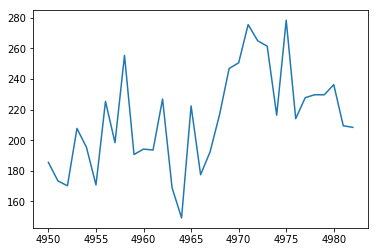

In [144]:
plt.plot(df[df.Product_ID=='P8'][df.Region=='R14']['Demand'])

In [130]:
l=range(1,13)
l1=range(1,10)
r=[]
r.append(l)
r.append(l)
r.append(l1)

In [133]:
r = [item for sublist in r for item in sublist]


In [135]:
len(r)

33

In [157]:
data['Month']=pd.Series(r)

In [233]:
def run(train,labels,test,params):
    dtrain=xgb.DMatrix(train,label=labels)
    dtest=xgb.DMatrix(test)
    bst=xgb.train(params,dtrain,100)
    preds=bst.predict(dtest)
    return bst,preds

params={
    'objective':'reg:linear',
#     'eta':0.05
}

In [234]:
data=df[df.Product_ID=='P8'][df.Region=='R10']
data=data.reset_index(drop=True)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [235]:
train=data.iloc[:-3,2:3]
y=data.iloc[:-3,3]
test=data.iloc[-3:,2:3]
y_test=data.iloc[-3:,3]


In [236]:
bst,preds=run(train,y,test,params)

In [237]:
np.absolute(preds-y_test.values).sum()

60.54552856445315

In [242]:
fro=sample.drop_duplicates(subset=['Product_ID','Region'])

In [247]:
d=pd.DataFrame(columns=sample.columns)

In [250]:
for i,j in zip(fro.Product_ID,fro.Region):
    data=df[df.Product_ID==i][df.Region==j]
    data=data.reset_index(drop=True)
    train=data.iloc[:-3,2:3]
    y=data.iloc[:-3,3]
    test=data.iloc[-3:,2:3]
    y_test=data.iloc[-3:,3]
    bst,preds=run(train,y,test,params)
    d.append(preds)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


XGBoostError: [18:19:37] src/objective/regression_obj.cc:89: Check failed: (info.labels.size()) != (0) label set cannot be empty

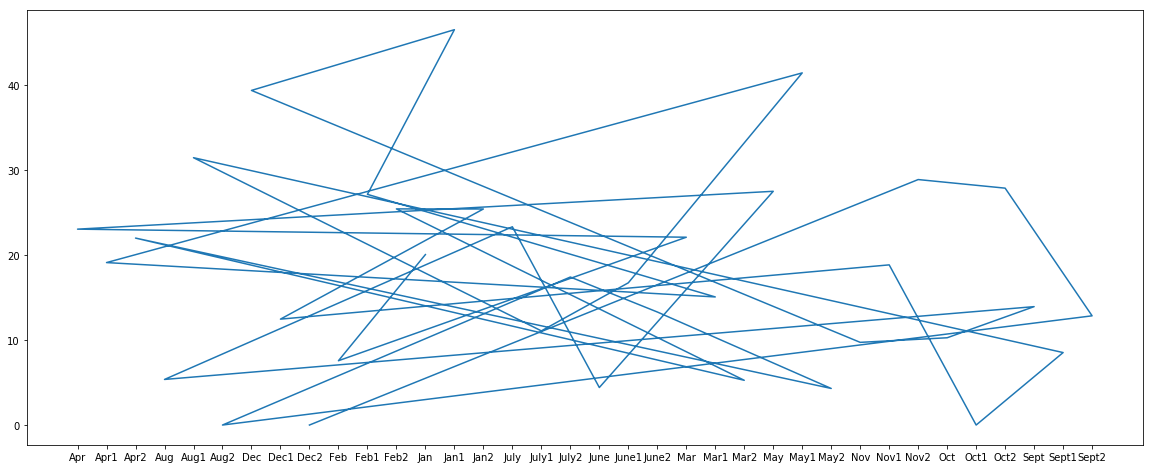

In [22]:
plt.figure(figsize=(20,8))
plt.plot(d)

In [19]:
cal=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec','Jan1','Feb1','Mar1','Apr1','May1','June1','July1','Aug1','Sept1','Oct1','Nov1','Dec1',
     'Jan2','Feb2','Mar2','Apr2','May2','June2','July2','Aug2','Sept2','Oct2','Nov2','Dec2',]

In [14]:
d=demand[demand.Product_ID=='P3'][demand.Region=='R11']['Demand']

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [20]:
d.index=pd.Series(cal)

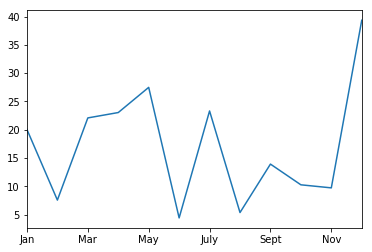

In [28]:
d['Jan':'Dec'].plot()

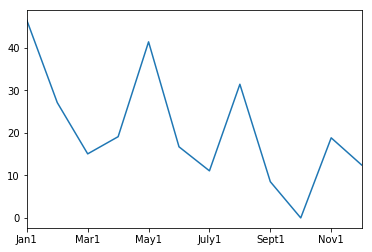

In [29]:
d['Jan1':'Dec1'].plot()

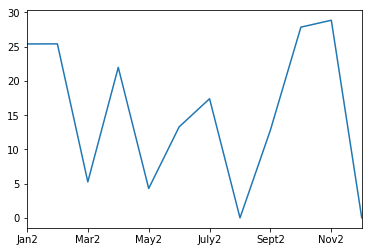

In [30]:
d['Jan2':'Dec2'].plot()

In [35]:
seq=pd.read_csv('/Users/shashank/Downloads/av_or/sample_submission_BqRDhl5/manufacture_sequence.csv')

In [39]:
sample['Demand']=

,Plant,Line,Month,Day,Product_ID
0,A,1,37,1,P28
1,A,1,37,2,NaN
2,A,1,37,3,NaN
3,A,1,37,4,NaN
4,A,1,37,5,NaN
5,A,1,37,6,NaN
6,A,1,37,7,NaN
7,A,1,37,8,NaN
8,A,1,37,9,NaN
9,A,1,37,10,NaN


In [40]:
dem=pd.read_csv('/Users/shashank/Downloads/av_or/train_HO825Pf/demand_price.csv')

In [41]:
dem

,Product_ID,Region,Demand_price
0,P1,R1,0.000000
1,P2,R1,0.000000
2,P3,R1,0.000000
3,P4,R1,0.000000
4,P5,R1,0.000000
5,P6,R1,0.000000
6,P7,R1,0.000000
7,P8,R1,0.000000
8,P9,R1,0.000000
9,P10,R1,0.000000
